01/28/21: Scripts to plot Figure 3 for the random features paper. This figure deals with GPs inspired by insect halteres

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from estimator import haltere_inspired_weights

## Sample GPs inspired by insect halteres

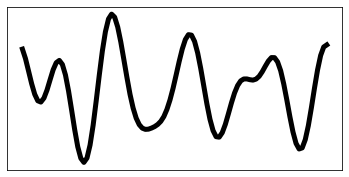

In [35]:
M, N, lowcut, highcut = 20, 100, 3, 8
W = haltere_inspired_weights(M, N, lowcut, highcut, random_state=8)
t = np.linspace(0, 1, N)

fig = plt.figure(figsize=(6, 3))
# plt.plot(t, W[0], lw=5, c='k', alpha=0.5)
plt.plot(t, W[1], lw=5, c='k', alpha=1)
plt.tick_params(axis='both', which='both', left=False, bottom=False, labelleft=False, labelbottom=False)
plt.savefig('results/paper_figs/figure_3/haltere_weights.pdf')

## Vary smoothness of GP weights 

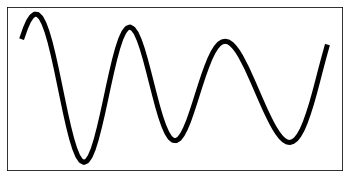

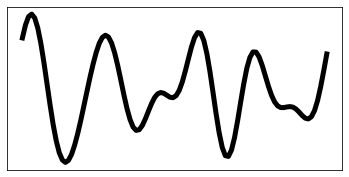

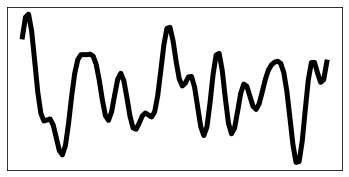

In [34]:
M, N, lowcut = 20, 100, 2
highcut_list = [5, 8, 15]
t = np.linspace(0, 1, N)

for highcut in highcut_list:
    W = haltere_inspired_weights(M, N, lowcut, highcut, random_state=7)
    fig = plt.figure(figsize=(6, 3))
    plt.plot(t, W[0], lw=5, c='k')
#     plt.plot(t, W[1], lw=5, c='k')
    plt.tick_params(axis='both', which='both', left=False, bottom=False, labelleft=False, labelbottom=False)
    plt.savefig('results/paper_figs/figure_3/haltere_weights_low=%d_high=%d.pdf'% (lowcut, highcut))

## Plot STAs of campaniform sensilla

Non-base: M4_U2, M23_U4 
Base: M16_U4, M20_U1, M24_U2

In [65]:
from scipy.io import loadmat

In [124]:
data_path = 'data/wing_sensilla_data_Pratt/'
moth, sensilla_num = 5, 0
spike_mat = loadmat(data_path + 'NonBase Spike Trains/NonBase Spike Train_M%d.mat' % (moth))['WN_Repeat_Matrix']
stim = loadmat(data_path + 'Motor Tip Displacement.mat')['Tip_Signal'].flatten()
spikes_for_sensilla = spike_mat[:, :, sensilla_num]

In [134]:
# params
sample_rate = 4e4
sta_time_window = 0.04 # in seconds
sample_window = int(sample_rate * sta_time_window)
nTrials = 30

STE = []
for i in range(nTrials):
    spikes_for_sensilla_trial = spikes_for_sensilla[:, i]
    spike_times = np.argwhere(spikes_for_sensilla_trial == 1).flatten() # array locations where spikes occurred
    spike_times = spike_times[spike_times > sample_window] # disregard array locations less than sample_window
    
    for time in spike_times:
        STE.append(stim[time - sample_window: time])
STE = np.array(STE)
STA = np.mean(STE, axis=0)
STE_std = np.std(STE, axis=0)

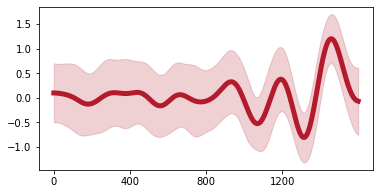

In [149]:
t = np.arange(len(STA))
fig = plt.figure(figsize=(6, 3))
plt.plot(t, STA, lw=5, c='#b31b2c')
plt.fill_between(t, STA - STE_std, STA + STE_std, alpha=0.2, color='#b31b2c')
# plt.tick_params(axis='both', which='both', left=False, bottom=False, labelleft=False, labelbottom=False)
plt.xticks(np.arange(0, 1600, 400))
plt.savefig('results/paper_figs/figure_3/haltere_STA.pdf')

(1600,)